In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\projects\supermart grocerry sale\Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [3]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,08-11-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,08-11-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,12-06-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,11-10-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,11-10-2016,South,2355,0.26,918.45,Tamil Nadu


In [4]:
print(df.dtypes)

Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object


In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

In [6]:
df['Order Date'].dtype

dtype('<M8[ns]')

In [7]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [8]:
df['Year'].unique()

array([2017, 2016, 2015, 2018])

In [9]:
df['Month'].unique()

array([11,  6, 10,  4, 12,  5,  8,  7,  9,  1,  3,  2])

In [10]:
df.describe(include="all")

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Year,Month
count,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994,9994.000000,9994.000000
unique,9994,50,7,23,24,NaN,5,NaN,NaN,NaN,1,NaN,NaN
top,OD1,Amrish,Snacks,Health Drinks,Kanyakumari,NaN,West,NaN,NaN,NaN,Tamil Nadu,NaN,NaN
freq,1,227,1514,719,459,NaN,3203,NaN,NaN,NaN,9994,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2017-04-30 05:17:08.056834048,NaN,1496.596158,0.226817,374.937082,NaN,2016.722233,7.809686
min,NaN,NaN,NaN,NaN,NaN,2015-01-03 00:00:00,NaN,500.000000,0.100000,25.250000,NaN,2015.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,2016-05-23 00:00:00,NaN,1000.000000,0.160000,180.022500,NaN,2016.000000,5.000000
50%,NaN,NaN,NaN,NaN,NaN,2017-06-26 00:00:00,NaN,1498.000000,0.230000,320.780000,NaN,2017.000000,9.000000
75%,NaN,NaN,NaN,NaN,NaN,2018-05-14 00:00:00,NaN,1994.750000,0.290000,525.627500,NaN,2018.000000,11.000000
max,NaN,NaN,NaN,NaN,NaN,2018-12-30 00:00:00,NaN,2500.000000,0.350000,1120.950000,NaN,2018.000000,12.000000


In [11]:
#Since we are not havining any null values or wrong data types for our columna we can move further for our analyis

# Sales Trends

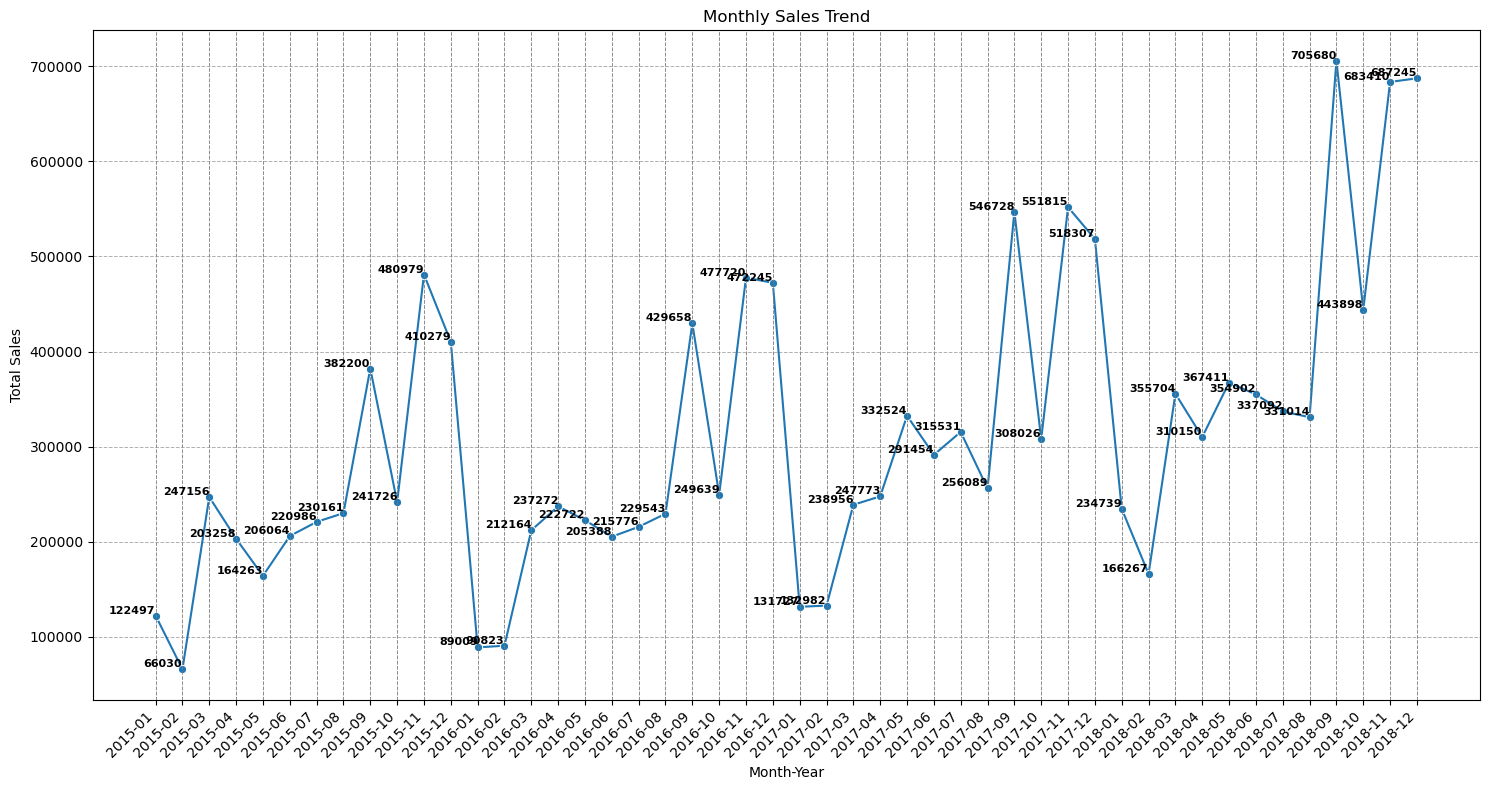

In [12]:
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()

# Plot the sales trends
plt.figure(figsize=(15,8))
sns.lineplot(data=monthly_sales, x='YearMonth', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')

for i, row in monthly_sales.iterrows():
    plt.text(row['YearMonth'], row['Sales'], f'{row["Sales"]}', ha='right', va='bottom', fontsize=8, fontweight='bold')
    plt.axvline(x=row['YearMonth'], color='gray', linestyle='--', linewidth=0.7, alpha=0.7)

plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Total Sales by Region

In [13]:
region = pd.pivot_table(data=df, index='Region', values=['Order ID', 'Sales'], 
               aggfunc = {'Order ID':'count', 'Sales':'sum'}).reset_index().sort_values(by='Sales', ascending=False)
region

,Region,Order ID,Sales
4,West,3203,4798743
1,East,2848,4248368
0,Central,2323,3468156
3,South,1619,2440461
2,North,1,1254


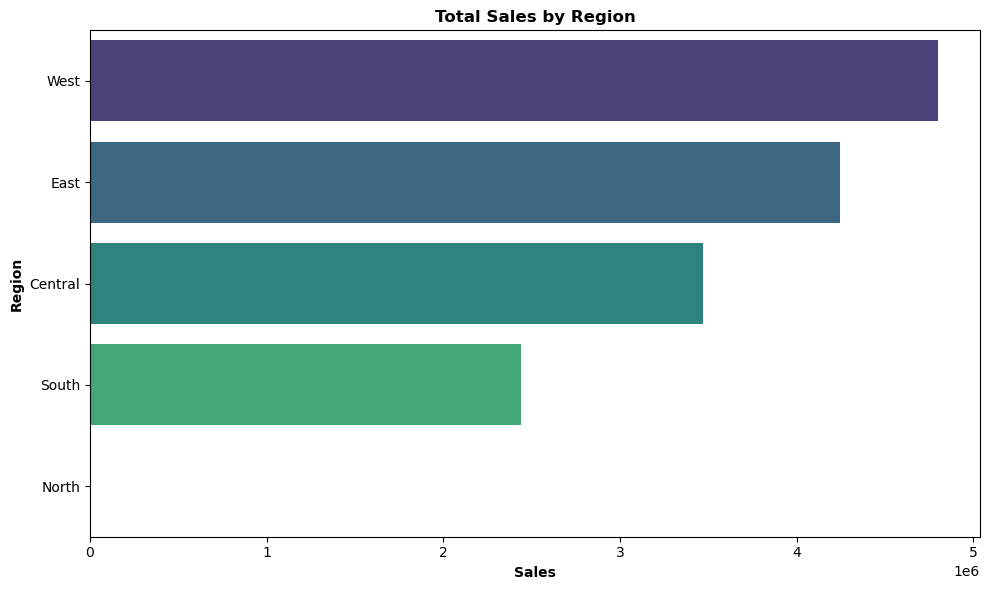

In [14]:
Sale_region = df.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Sales', y='Region', data=Sale_region, palette='viridis')
plt.title('Total Sales by Region', fontweight='bold')
plt.xlabel('Sales', fontweight='bold', fontsize=10)
plt.ylabel('Region', fontweight='bold', fontsize=10)



plt.tight_layout() 
plt.show()

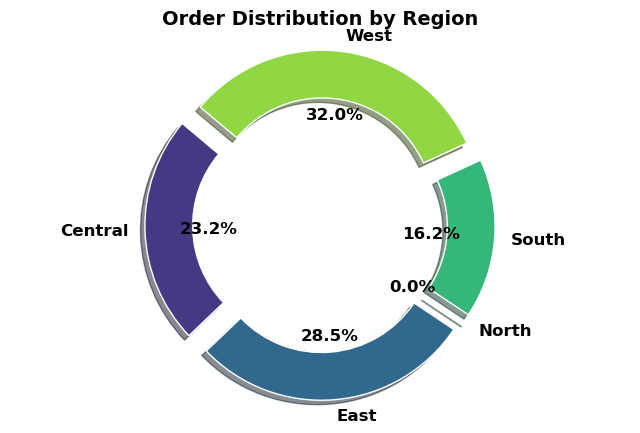

In [15]:
Sale_region = df.groupby('Region')['Order ID'].count().reset_index()
Sale_region.rename(columns={'Order ID': 'Order Count'}, inplace=True)

colors = sns.color_palette('viridis', len(Sale_region))
explode = [0.1] * len(Sale_region) 

plt.figure(figsize=(8, 5))
plt.pie(
    Sale_region['Order Count'], 
    labels=Sale_region['Region'], 
    autopct='%1.1f%%', 
    colors=colors, 
    explode=explode, 
    shadow=True,
    startangle=140,
    wedgeprops=dict(width=0.3, edgecolor='w'),
    textprops={'fontweight': 'bold', 'fontsize': 12}
)

plt.title('Order Distribution by Region', fontweight='bold', fontsize=14)
plt.axis('equal') 

plt.show()

# Total Profit by Category 

In [16]:
Profit_by_category = pd.pivot_table(data=df, index='Category', values=['Profit'], 
               aggfunc = {'Profit':'sum'}).reset_index().sort_values(by='Profit', ascending=False)
Profit_by_category

,Category,Profit
6,Snacks,568178.85
2,"Eggs, Meat & Fish",567357.22
4,Fruits & Veggies,530400.38
3,Food Grains,529162.64
0,Bakery,528521.06
1,Beverages,525605.76
5,Oil & Masala,497895.29


# Total Profit by Region

In [17]:
Profit_by_Region = pd.pivot_table(data=df, index='Region', values=['Profit'], 
               aggfunc = {'Profit':'sum'}).reset_index().sort_values(by='Profit', ascending=False)
Profit_by_Region

,Region,Profit
4,West,1192004.61
1,East,1074345.58
0,Central,856806.84
3,South,623562.89
2,North,401.28


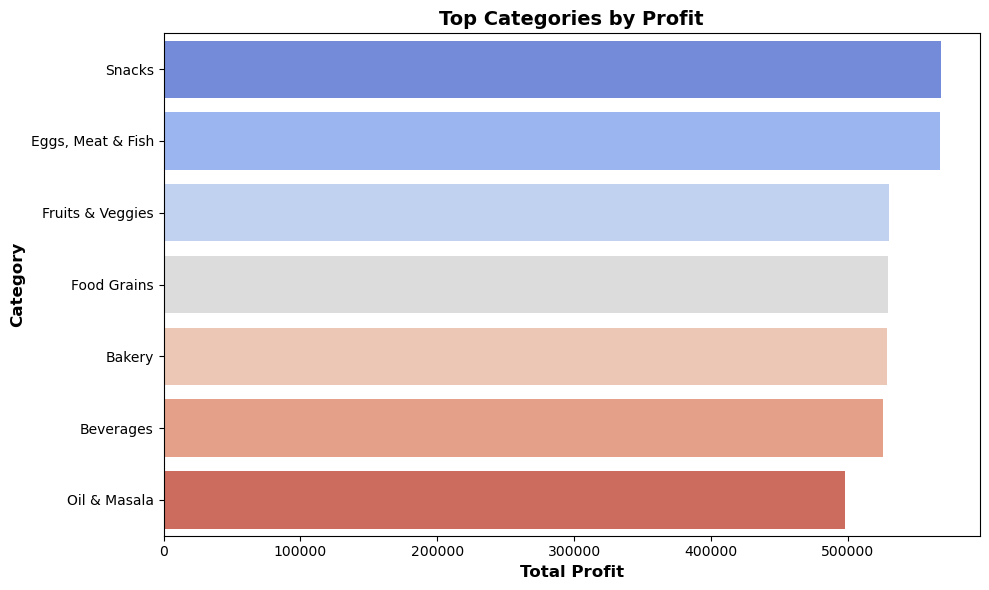

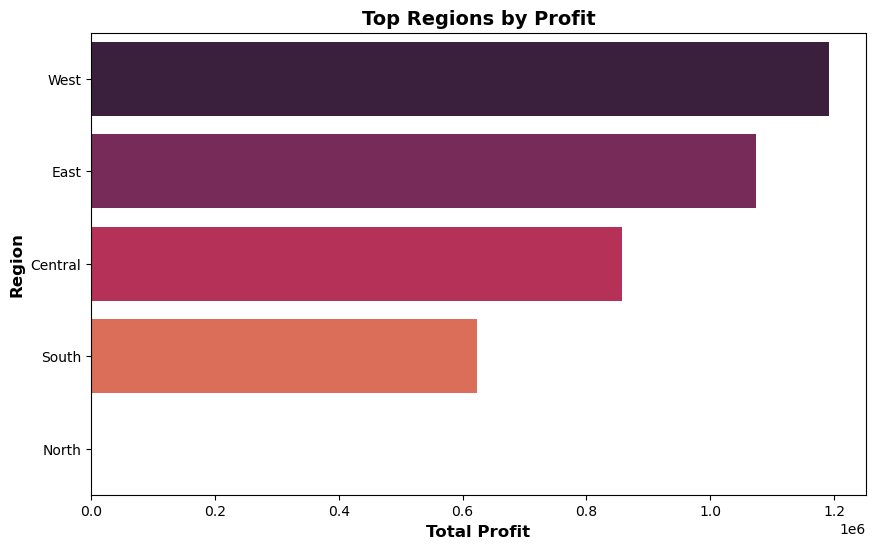

In [18]:
# Top-performing categories by profit
category_profit = df.groupby('Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Profit', y='Category', data=category_profit, palette='coolwarm')
plt.title('Top Categories by Profit', fontweight='bold', fontsize=14)
plt.xlabel('Total Profit', fontweight='bold', fontsize=12)
plt.ylabel('Category', fontweight='bold', fontsize=12)

plt.tight_layout() 
plt.show()

# Top-performing regions by profit
region_profit = df.groupby('Region')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Profit', y='Region', data=region_profit, palette='rocket')
plt.title('Top Regions by Profit', fontweight='bold', fontsize=14)
plt.xlabel('Total Profit', fontweight='bold', fontsize=12)
plt.ylabel('Region', fontweight='bold', fontsize=12)



plt.show()

# Total Sales by Cities

In [19]:
Sale_by_Cities = pd.pivot_table(data=df, index='City', values=['Sales' ], 
               aggfunc = {'Sales':'sum'}).reset_index().sort_values(by='Sales', ascending=False)
Sale_by_Cities

,City,Sales
6,Kanyakumari,706764
21,Vellore,676550
0,Bodi,667177
19,Tirunelveli,659812
13,Perambalur,659738
16,Salem,657093
14,Pudukottai,653179
17,Tenkasi,643652
7,Karur,642273
8,Krishnagiri,637273


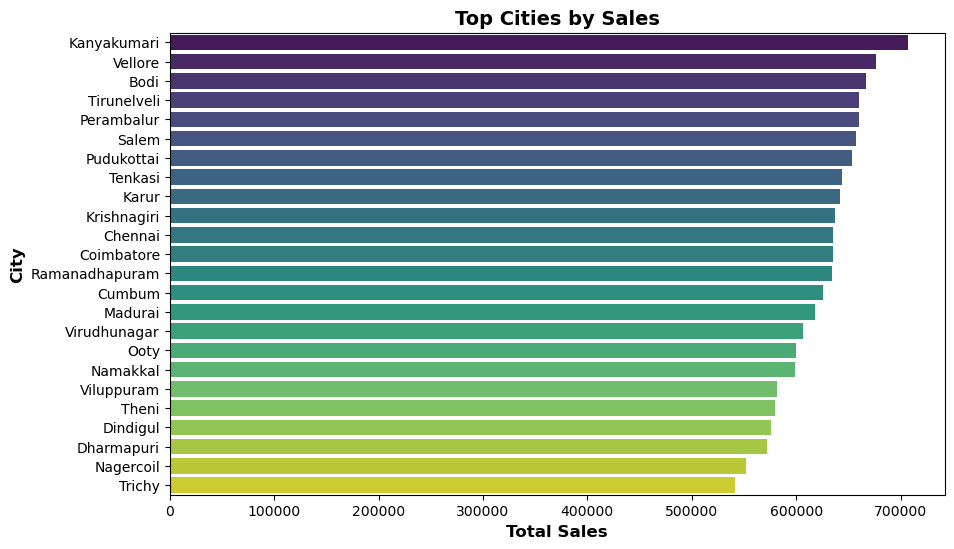

In [20]:
# Top-performing cities by sales
Sale_by_Cities = df.groupby('City')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

plt.figure(figsize=(10, 6))
palette = sns.color_palette("viridis", len(Sale_by_Cities))
ax = sns.barplot(x='Sales', y='City', data=Sale_by_Cities, palette=palette)
plt.title('Top Cities by Sales', fontweight='bold', fontsize=14)
plt.xlabel('Total Sales', fontweight='bold', fontsize=12)
plt.ylabel('City', fontweight='bold', fontsize=12)

plt.show()

# Observations

•	Sales trends between months and years show that overall sales at grocery stores have increased over the years. However, a    pattern has emerged where sales peak in the final months of the year, followed by a sudden decline at the beginning of the next year.

•	Stores in the Western and Eastern regions have performed the best compared to stores in other regions. In contrast, stores in the Northern region have performed the worst over the last three years.

•	Snacks, animal-based foods, and day-to-day food items (vegetables and fruits) have generated the highest profit.

•	The Western and Eastern regions have generated the highest revenue, while the Central and Southern regions' grocery stores have generated average profit. The Northern region's grocery stores have performed the worst and generated very low revenue.

•	The city of Kanyakumari has the highest number of sales across all years.

•	The city of Nagercoil has the lowest number of sales across all years.


# Implications

•	Seasonal Sales Strategy:
The observed peak in sales towards the end of the year and subsequent decline in the first months of the new year suggests a need for strategic planning to manage inventory and promotions effectively. Implementing targeted marketing campaigns or discounts during the slow start of the year could help smooth out sales fluctuations.

•	Regional Performance Insights:
The superior performance of Western and Eastern region stores indicates potential for expanding or investing further in these areas. Conversely, the poor performance of Northern region stores suggests a need for a review of strategies in these locations, such as improved customer engagement or better inventory management.

•	Product Focus:
The high profitability of snacks, animal-based foods, and day-to-day food items highlights the importance of focusing on these categories. Strategies to promote these products or expand their range could further boost profitability.
•	Revenue Generation:

With Western and Eastern regions generating the highest revenue, there is an opportunity to enhance business operations and marketing in these regions. For the Central and Southern regions, efforts should be made to increase profitability and sales. The Northern region's low revenue generation indicates a need for a strategic overhaul or targeted initiatives to improve performance.

•	City-Level Strategy:
Given that Kanyakumari has the highest sales, leveraging this city's success through additional promotions or opening new stores could be beneficial. In contrast, for Nagercoil, strategies to boost sales and attract more customers are essential to improve its performance.
